# FLIGHT PRICE PREDICTION PROJECT

#### Exploratory Data Analysis

Importing Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing the datasets

In [2]:
traindf=pd.read_excel('Data_Train.xlsx')
testdf=pd.read_excel('Test_set.xlsx')

In [3]:
traindf.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
testdf.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [5]:
traindf.shape

(10683, 11)

The training dataset contains 10683 rows and 11 columns

In [6]:
testdf.shape

(2671, 10)

The testing dataset contains 2671 rows and 10 columns

Information about the features

In [7]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


# Missing Values

In [9]:
traindf.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

<AxesSubplot:>

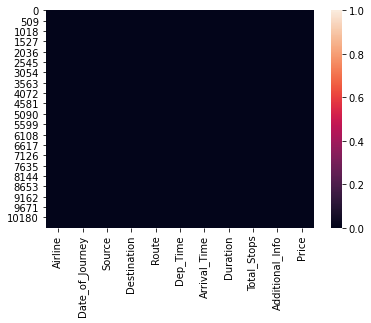

In [10]:
sns.heatmap(traindf.isnull())

In [11]:
traindf.dropna(inplace=True)

In [12]:
testdf.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

<AxesSubplot:>

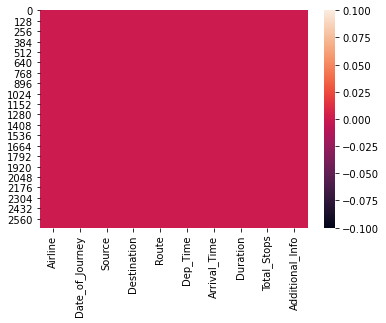

In [13]:
sns.heatmap(testdf.isnull())

# Statistical Calculation

In [14]:
traindf.describe(include="O")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10682,10682,10682,10682,10682,10682,10682,10682,10682,10682
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4536,4536,2376,233,423,550,5625,8344


Additional_Info column has majority of "No info" .Similarly other top values of the columns is given in the table.

In [15]:
traindf.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Mean is less than 75 percentile. Maximum price is 79512.

In [16]:
testdf.describe(include="O")

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL → BOM → COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [17]:
traindf['Source']="train"
testdf['Source']="test"
df=pd.concat([traindf,testdf],ignore_index=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,train,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,train,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,train,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,train,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,train,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [18]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
13348,Air India,6/06/2019,test,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
13349,IndiGo,27/03/2019,test,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
13350,Jet Airways,6/03/2019,test,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
13351,Air India,6/03/2019,test,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN
13352,Multiple carriers,15/06/2019,test,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,NaN


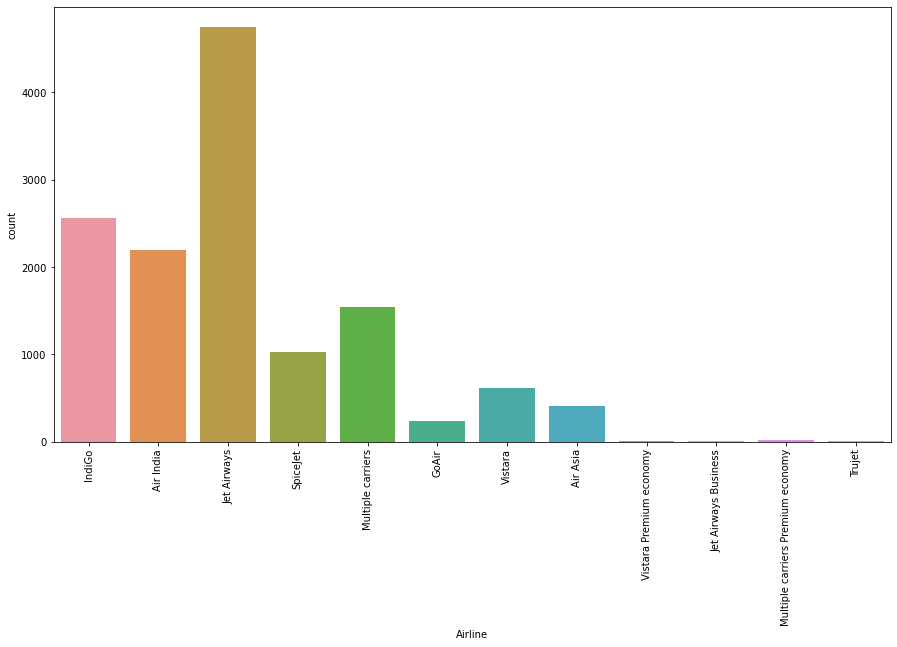

In [19]:
plt.figure(figsize=(15,8))
sns.countplot(x="Airline",data=df)
plt.xticks(rotation=90);

The count of Jet Airways is largest as compared to other airlines.

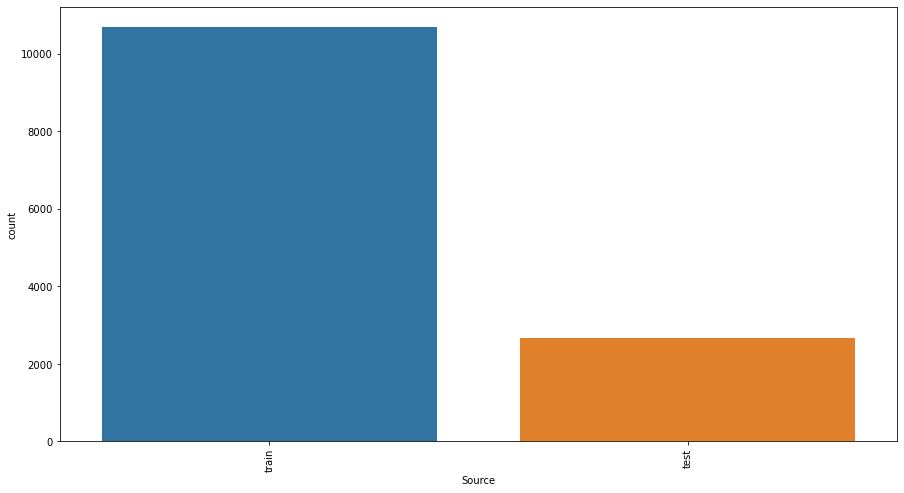

In [20]:
plt.figure(figsize=(15,8))
sns.countplot(x="Source",data=df)
plt.xticks(rotation=90);

The above plot shows that training data is more than the testing data.

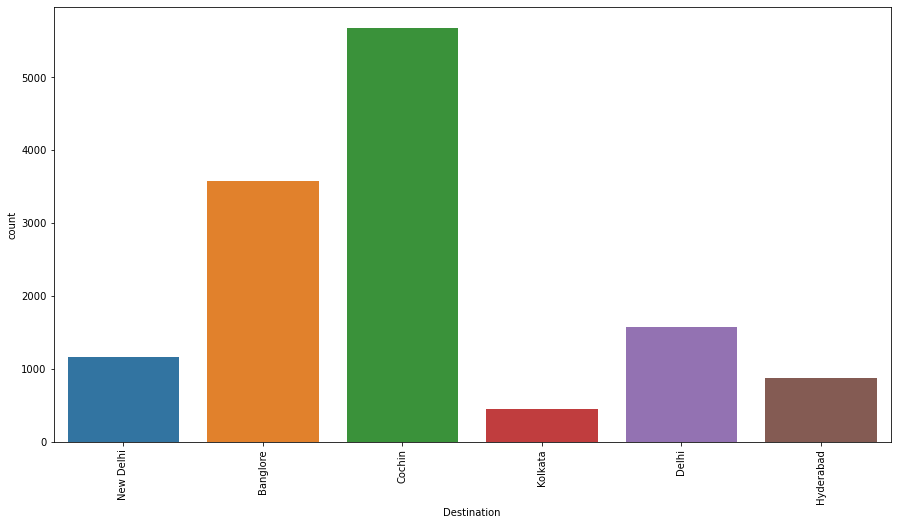

In [21]:
plt.figure(figsize=(15,8))
sns.countplot(x="Destination",data=df)
plt.xticks(rotation=90);

The count of Cochin as a destination is highest than the rest.

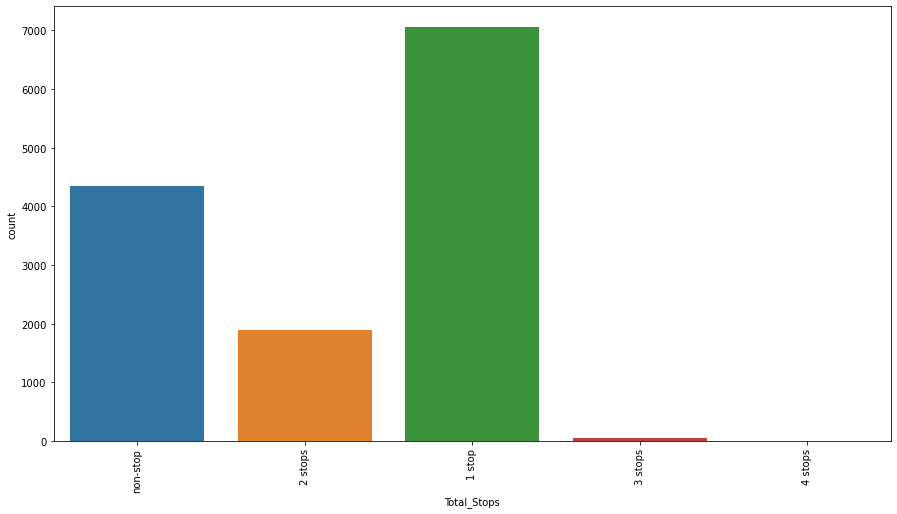

In [22]:
plt.figure(figsize=(15,8))
sns.countplot(x="Total_Stops",data=df)
plt.xticks(rotation=90);

1 stop flights are more preferred by the passengers.

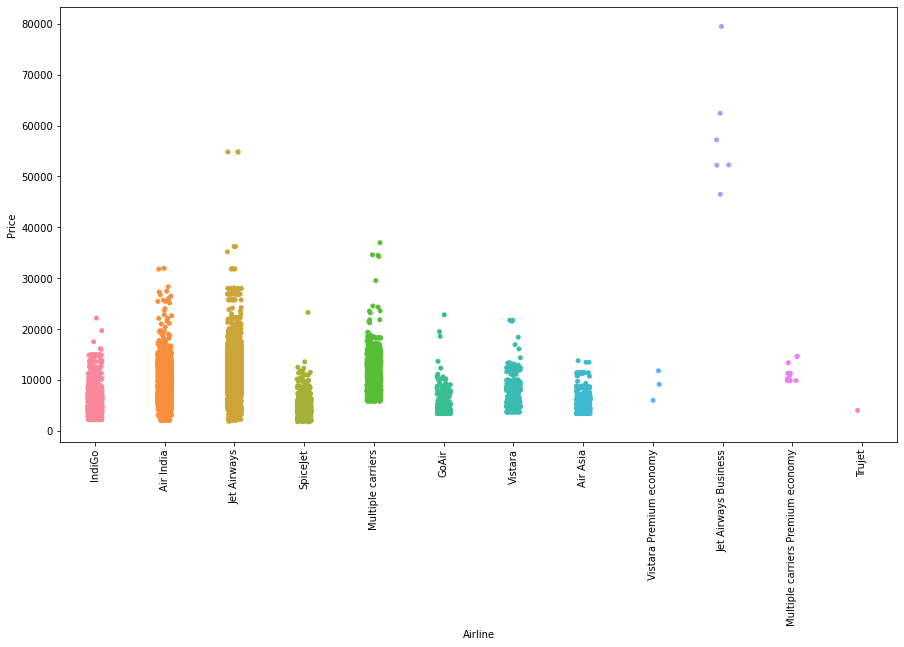

In [23]:
plt.figure(figsize=(15,8))
sns.stripplot(x="Airline",y="Price",data=traindf)
plt.xticks(rotation=90);

Price of Jet Airways Business is the highest.

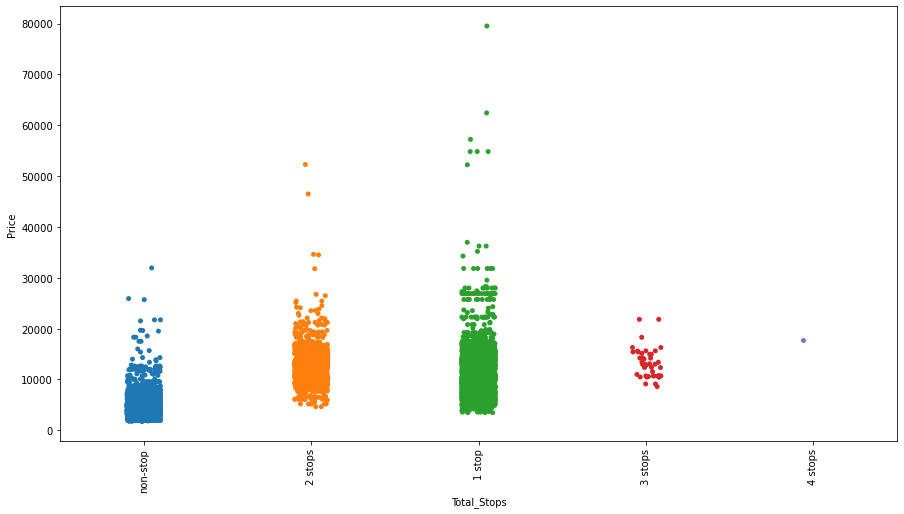

In [24]:
plt.figure(figsize=(15,8))
sns.stripplot(x="Total_Stops",y="Price",data=traindf)
plt.xticks(rotation=90);

Price of 1 stop airlines is more than the rest.

In [25]:
df["Month"]=pd.to_datetime(df["Date_of_Journey"]).dt.month
df["Day"]=pd.to_datetime(df["Date_of_Journey"]).dt.day
df.drop("Date_of_Journey",axis=1,inplace=True)

In [26]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day
0,IndiGo,train,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,3,24
1,Air India,train,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5


In [27]:
df["Dep_hour"]=pd.to_datetime(df['Dep_Time']).dt.hour
df["Dep_minute"]=pd.to_datetime(df['Dep_Time']).dt.minute
df.drop("Dep_Time",axis=1,inplace=True)

In [28]:
df.head(2)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_hour,Dep_minute
0,IndiGo,train,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,3,24,22,20
1,Air India,train,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662.0,1,5,5,50


In [29]:
df["Arrival_hour"]=pd.to_datetime(df['Arrival_Time']).dt.hour
df["Arrival_minute"]=pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop("Arrival_Time",axis=1,inplace=True)

In [30]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,train,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,3,24,22,20,1,10
1,Air India,train,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,5,50,13,15


In [31]:
duration=list(df['Duration'])

for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]:                   # Check if duration contains only hour
            duration[i]=duration[i] + ' 0m'      # Adds 0 minute
        else:
            duration[i]='0h '+ duration[i]

In [32]:
df['Duration']=duration
df.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Month,Day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute
0,IndiGo,train,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897.0,3,24,22,20,1,10
1,Air India,train,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662.0,1,5,5,50,13,15
2,Jet Airways,train,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882.0,9,6,9,25,4,25


In [33]:
def hour(x):
    return x.split(' ')[0][0:-1]
def min(x):
    return x.split(' ')[1][0:-1]

In [34]:
df['Duration_hours']=df['Duration'].apply(hour)
df['Duration_mins']=df['Duration'].apply(min)

In [35]:
df.drop('Duration',axis=1,inplace=True)

In [36]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Month,Day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,train,New Delhi,BLR → DEL,non-stop,No info,3897.0,3,24,22,20,1,10,2,50
1,Air India,train,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662.0,1,5,5,50,13,15,7,25


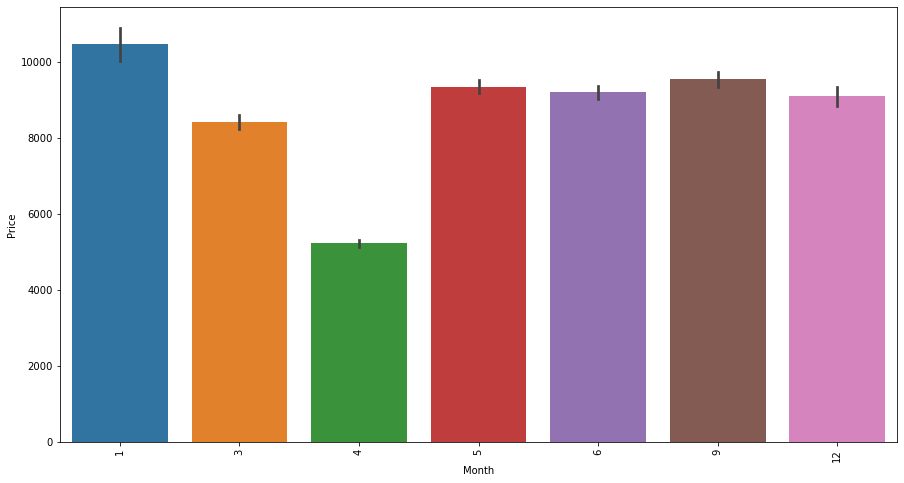

In [37]:
plt.figure(figsize=(15,8))
sns.barplot(x="Month",y="Price",data=df)
plt.xticks(rotation=90);

Charges are higher in 1st Month as compared to the other months.

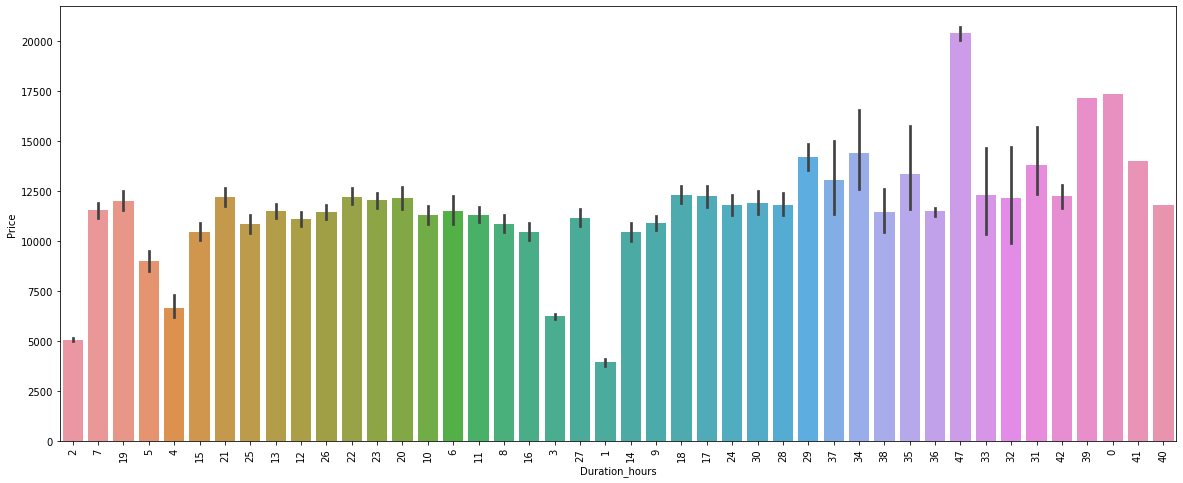

In [38]:
plt.figure(figsize=(20,8))
sns.barplot(x="Duration_hours",y="Price",data=df)
plt.xticks(rotation=90);

The price for 47 hour journey is the highest.

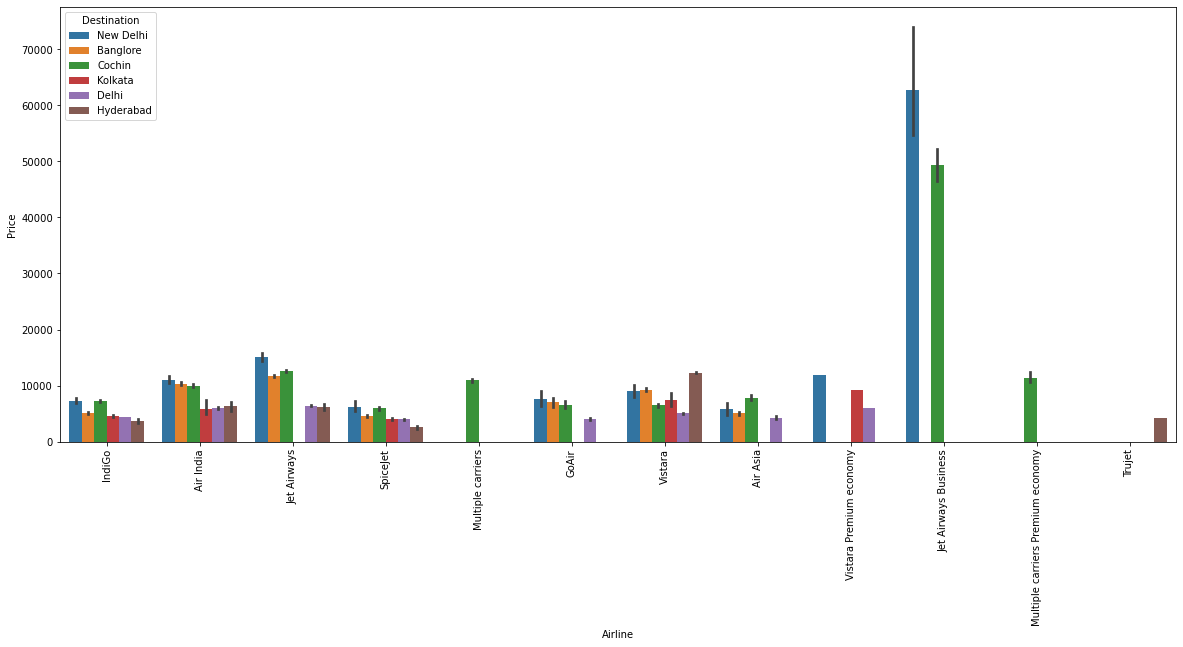

In [39]:
plt.figure(figsize=(20,8))
sns.barplot(x="Airline",y="Price",hue="Destination",data=df)
plt.xticks(rotation=90);

The Jet Airways Business flight of New Delhi is highly expensive.

In [40]:
df.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [41]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,IndiGo,train,New Delhi,non-stop,3897.0,3,24,22,20,1,10,2,50
1,Air India,train,Banglore,2 stops,7662.0,1,5,5,50,13,15,7,25


# Encoding

In [42]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
df['Airline']=label.fit_transform(df['Airline'])
df['Destination']=label.fit_transform(df['Destination'])
df['Total_Stops']=label.fit_transform(df['Total_Stops'])

In [43]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Month,Day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,3,train,5,4,3897.0,3,24,22,20,1,10,2,50
1,1,train,0,1,7662.0,1,5,5,50,13,15,7,25


In [45]:
train=df.loc[df["Source"]=="train"]
test=df.loc[df["Source"]=="test"]
train.drop(["Source"],axis=1,inplace=True)
test.drop(["Source"],axis=1,inplace=True)

# Separating x(Independent) and y(target) variable.

In [47]:
x=train.drop(["Price"],axis=1)
y=train["Price"]

In [48]:
x.head(2)

,Airline,Destination,Total_Stops,Month,Day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,3,5,4,3,24,22,20,1,10,2,50
1,1,0,1,1,5,5,50,13,15,7,25


In [49]:
y.head(2)

0    3897.0
1    7662.0
Name: Price, dtype: float64

# Scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [51]:
x.head(2)

,Airline,Destination,Total_Stops,Month,Day,Dep_hour,Dep_minute,Arrival_hour,Arrival_minute,Duration_hours,Duration_mins
0,0.272727,1.0,1.00,0.181818,0.875000,0.956522,0.363636,0.043478,0.181818,0.042553,0.909091
1,0.090909,0.0,0.25,0.000000,0.083333,0.217391,0.909091,0.565217,0.272727,0.148936,0.454545


# Finding the best random state

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
lr=LinearRegression()
for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state{i},the training accuracy is:{r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:{r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is:0.4149387807214906
At random state0,the testing accuracy is:0.4008861796230634


At random state1,the training accuracy is:0.40208333074510494
At random state1,the testing accuracy is:0.432750744209898


At random state2,the training accuracy is:0.4088698884222116
At random state2,the testing accuracy is:0.41386327626194896


At random state3,the training accuracy is:0.3995334817229833
At random state3,the testing accuracy is:0.43804611997274057


At random state4,the training accuracy is:0.42218492497307714
At random state4,the testing accuracy is:0.3843506193073041


At random state5,the training accuracy is:0.4152409631211308
At random state5,the testing accuracy is:0.40072164696274637


At random state6,the training accuracy is:0.4157580004965651
At random state6,the testing accuracy is:0.3990538798878813


At random state7,the training accuracy is:0.4015943947185726
At random state7,the testing accuracy is:0.43352088338145167


At random s

# Train Test Split

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=98)

# Model Selection

In [54]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [55]:
lm.score(x_train,y_train)

0.396975872181365

In [56]:
pred=lm.predict(x_test)
print("Predicted Price:",pred)
print("Actual Price:",y_test)

Predicted Price: [ 4220.4195128  13853.4873369   7765.15096211 ... 11615.79550082
  5594.25627949  8649.9186696 ]
Actual Price: 9289      4050.0
3108     13817.0
9106      6477.0
2298     12692.0
3838      2227.0
          ...   
9051      8040.0
488       3597.0
7086     12898.0
10467     3625.0
3114      5268.0
Name: Price, Length: 3205, dtype: float64


In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
print("r2 Score:",r2_score(y_test,pred))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 Score: 0.4471501226421607
Error:
Mean Absolute Error: 2464.4458406298377
Mean Squared Error: 10721194.528895333
Root Mean Squared Error: 3274.323522331801


In [59]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [60]:
dtr.score(x_train,y_train)

0.9749560355735821

In [61]:
dtr.score(x_test,y_test)

0.6803648781498883

In [62]:
preddtr=dtr.predict(x_test)
print("Predicted Sales:",preddtr)
print("Actual Sales:",y_test)

Predicted Sales: [ 5678. 11087.  7648. ... 16079.  3573.  6704.]
Actual Sales: 9289      4050.0
3108     13817.0
9106      6477.0
2298     12692.0
3838      2227.0
          ...   
9051      8040.0
488       3597.0
7086     12898.0
10467     3625.0
3114      5268.0
Name: Price, Length: 3205, dtype: float64


In [63]:
print("r2 Score:",r2_score(y_test,preddtr))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,preddtr))
print("Mean Squared Error:",mean_squared_error(y_test,preddtr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,preddtr)))

r2 Score: 0.6803648781498883
Error:
Mean Absolute Error: 1357.924640071317
Mean Squared Error: 6198554.90608009
Root Mean Squared Error: 2489.6897208447663


In [64]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [65]:
svr.score(x_train,y_train)

0.04462901158348431

In [66]:
predsvr=svr.predict(x_test)
print("Predicted Sales:",predsvr)
print("Actual Sales:",y_test)

Predicted Sales: [7753.1229828  8351.61094396 7869.96562892 ... 8467.12334453 7794.70357382
 8474.03087437]
Actual Sales: 9289      4050.0
3108     13817.0
9106      6477.0
2298     12692.0
3838      2227.0
          ...   
9051      8040.0
488       3597.0
7086     12898.0
10467     3625.0
3114      5268.0
Name: Price, Length: 3205, dtype: float64


In [67]:
print("r2 Score:",r2_score(y_test,predsvr))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,predsvr))
print("Mean Squared Error:",mean_squared_error(y_test,predsvr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predsvr)))

r2 Score: 0.053678169110931706
Error:
Mean Absolute Error: 3360.008916398911
Mean Squared Error: 18351637.309553307
Root Mean Squared Error: 4283.881103573406


# Ensemble Technique

In [68]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [69]:
rfr.score(x_train,y_train)

0.9544588411920729

In [70]:
predrfr=rfr.predict(x_test)
print("Predicted Sales:",predrfr)
print("Actual Sales:",y_test)

Predicted Sales: [ 4906.83       11250.8         7599.92566667 ... 15573.96840476
  3716.86666667  6808.38      ]
Actual Sales: 9289      4050.0
3108     13817.0
9106      6477.0
2298     12692.0
3838      2227.0
          ...   
9051      8040.0
488       3597.0
7086     12898.0
10467     3625.0
3114      5268.0
Name: Price, Length: 3205, dtype: float64


In [71]:
print("r2 Score:",r2_score(y_test,predrfr))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,predrfr))
print("Mean Squared Error:",mean_squared_error(y_test,predrfr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predrfr)))

r2 Score: 0.7845980591267713
Error:
Mean Absolute Error: 1175.9047802171083
Mean Squared Error: 4177202.898262974
Root Mean Squared Error: 2043.8206619620455


In [72]:
from xgboost import XGBRegressor
model=XGBRegressor(n_estimators=1000,learning_rate=0.05)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [73]:
y_pred=model.predict(x_test)
y_pred

array([ 4872.681 , 11343.306 ,  8160.9272, ..., 14955.011 ,  3711.5083,
        7057.7607], dtype=float32)

In [74]:
model.score(x_train,y_train)

0.9525610606624579

In [75]:
predxgb=model.predict(x_test)
print("Predicted Sales:",predxgb)
print("Actual Sales:",y_test)

Predicted Sales: [ 4872.681  11343.306   8160.9272 ... 14955.011   3711.5083  7057.7607]
Actual Sales: 9289      4050.0
3108     13817.0
9106      6477.0
2298     12692.0
3838      2227.0
          ...   
9051      8040.0
488       3597.0
7086     12898.0
10467     3625.0
3114      5268.0
Name: Price, Length: 3205, dtype: float64


In [76]:
print("r2 Score:",r2_score(y_test,predxgb))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,predxgb))
print("Mean Squared Error:",mean_squared_error(y_test,predxgb))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predxgb)))

r2 Score: 0.8235032391828431
Error:
Mean Absolute Error: 1165.0425511590777
Mean Squared Error: 3422730.444445524
Root Mean Squared Error: 1850.0622812342085


# Cross Validation

In [77]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k=5
kfold=KFold(n_splits=k,shuffle=True)
K_results=cross_val_score(lm,x,y,cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.4104516443948434

In [78]:
from sklearn.model_selection import KFold
k=5
kfold=KFold(n_splits=k,shuffle=True)
K_results=cross_val_score(dtr,x,y,cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.6559092824407832

In [79]:
k=5
kfold=KFold(n_splits=k,shuffle=True)
K_results=cross_val_score(svr,x,y,cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.05691103823592232

In [80]:
k=5
kfold=KFold(n_splits=k,shuffle=True)
K_results=cross_val_score(rfr,x,y,cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.7882176736052532

In [81]:
k=5
kfold=KFold(n_splits=k,shuffle=True)
K_results=cross_val_score(model,x,y,cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.818506957542458

#### As the least difference between accuracy and cross validation score is for RandomForestRegressor it is our best model.

# Hyperparameter Tuning

In [90]:
from sklearn.model_selection import GridSearchCV
parameters={'min_samples_split':list(np.arange(2,10)),'max_depth':list(np.arange(1,10)),
            "bootstrap":[True,False]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'bootstrap': True, 'max_depth': 9, 'min_samples_split': 4}


In [91]:
rf=RandomForestRegressor(bootstrap=True,max_depth=9,min_samples_split=4)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 score:',rfs*100)

R2 score: 79.48974058307303


# Saving the model

In [92]:
import pickle
filename='Price.pkl'
pickle.dump(rf,open(filename,'wb'))

# Prediction

In [93]:
loaded_model=pickle.load(open('Price.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.7948974058307303


In [94]:
loaded_model.predict(x_test)

array([ 4667.73516686, 12184.92139789,  7045.87384747, ...,
       13104.69789032,  4102.9352421 ,  6485.78232466])